In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
os.chdir('C:/Users/norri/Desktop')
nch = pd.read_csv('NCH Q3 Offer Redemption Report.csv')
over_under = pd.read_csv('Coupon Over-Under Report_YTD 08-31-2024.csv')

In [13]:
def missing_values(df):
    """

    This function is used early on in the EDA to determine how manu
    are missing.
    """
    names = [var for var in df.columns]
    missing_count = df[names].isnull().sum()
    var_count = np.array(df[names].isnull().sum() * 100/ len(df)).round(2)
    missing = pd.DataFrame(index=names)
    missing["Count Missing"] = missing_count
    missing["Percent Missing"] = var_count
    print(missing)

In [14]:
nch['Offer Code'].astype(int)
over_under["Offer Code"].astype(int)

0      23864
1      23896
2      23983
3      23984
4      23985
       ...  
426    24788
427    24789
428    24790
429    24791
430    24812
Name: Offer Code, Length: 431, dtype: int32

In [15]:


def unique(df):
    """

    Like the above method, it calculates the number of unique entries.
    """
    percent_unique = np.array(100 * df.nunique()/len(df.index)).round(2)
    count_unique = df.nunique()
    names = [var for var in df.columns]
    unique_df = pd.DataFrame(index=names)
    unique_df["Count Unique"] = count_unique
    unique_df["Percent Unique"] = percent_unique
    print(unique_df)

In [17]:
forecast = nch.merge(over_under, how="inner", left_on="Offer Code", right_on='Offer Code')
forecast['check'] = forecast['Offer Code'] - forecast['Offer Code']

<Axes: ylabel='Media'>

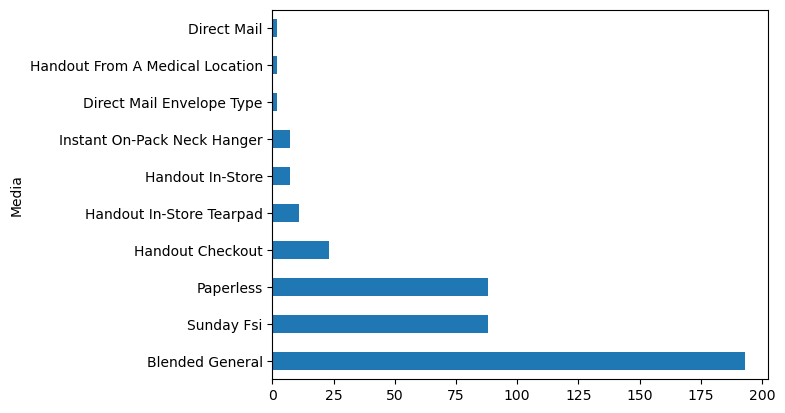

In [18]:
forecast['Media'].value_counts()[:10].plot(kind='barh')

In [19]:
print(forecast['Media'].value_counts()[:10])

Media
Blended General                    193
Sunday Fsi                          88
Paperless                           88
Handout Checkout                    23
Handout In-Store Tearpad            11
Handout In-Store                     7
Instant On-Pack Neck Hanger          7
Direct Mail Envelope Type            2
Handout From A Medical Location      2
Direct Mail                          2
Name: count, dtype: int64


In [20]:
print('Blended General')
print((97/(len(forecast['Media'])))*100)
print('Sunday FSI')
print(95/(len(forecast['Media']))*100)
print('Handout Checkout')
print(42/(len(forecast['Media']))*100)
print('Paperless')
print(23/(len(forecast['Media']))*100)
print('All other')
print(24/(len(forecast['Media']))*100)

Blended General
22.505800464037122
Sunday FSI
22.041763341067284
Handout Checkout
9.744779582366588
Paperless
5.336426914153132
All other
5.56844547563805


In [21]:
missing_values(forecast)

                                   Count Missing  Percent Missing
Brand                                          0             0.00
Offer Code                                     0             0.00
Accounting Number                              0             0.00
CD3 - Type Of Promotion Code/Desc              9             2.09
Media                                          0             0.00
Offer Type                                     0             0.00
Media Vendor                                   0             0.00
Offer Description                              0             0.00
Face Value (max)                               0             0.00
Buy Qty                                        0             0.00
Issue Date                                     0             0.00
Exp Date                                       0             0.00
Distribution Qty                               0             0.00
Offer Status                                   0             0.00
Weeks Rede

In [22]:
forecast.fillna(0, inplace=True)

In [23]:
unique(forecast)

                                   Count Unique  Percent Unique
Brand                                        17            3.94
Offer Code                                  429           99.54
Accounting Number                            20            4.64
CD3 - Type Of Promotion Code/Desc             4            0.93
Media                                        16            3.71
Offer Type                                    3            0.70
Media Vendor                                  8            1.86
Offer Description                           423           98.14
Face Value (max)                             12            2.78
Buy Qty                                       2            0.46
Issue Date                                   49           11.37
Exp Date                                     73           16.94
Distribution Qty                            201           46.64
Offer Status                                  2            0.46
Weeks Redeemed                          

In [24]:
forecast.to_csv('forecast.csv', index=False)